Univariate Linear Regression on the California Housing Prices Dataset

The goal of this report is to use Linear regression to analyze the relationship between median house value vs. median income, population and number of households.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv("housing.csv")
print("\nImported housing dataset.")


Imported housing dataset.


In [7]:
print("\nDescriptive Statistics:")
print(df[['median_house_value', 'median_income', 'population', 'households']].describe())


Descriptive Statistics:
       median_house_value  median_income    population    households
count        20640.000000   20640.000000  20640.000000  20640.000000
mean        206855.816909       3.870671   1425.476744    499.539680
std         115395.615874       1.899822   1132.462122    382.329753
min          14999.000000       0.499900      3.000000      1.000000
25%         119600.000000       2.563400    787.000000    280.000000
50%         179700.000000       3.534800   1166.000000    409.000000
75%         264725.000000       4.743250   1725.000000    605.000000
max         500001.000000      15.000100  35682.000000   6082.000000


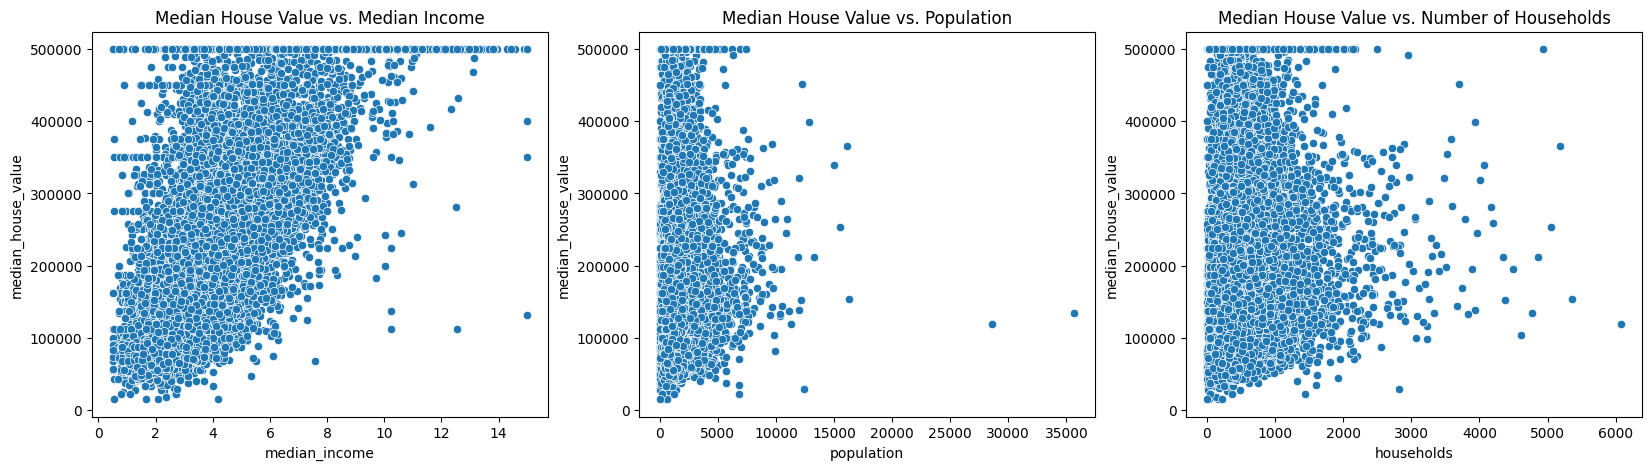

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.scatterplot(data=df, x='median_income', y='median_house_value', ax=axes[0])
axes[0].set_title('Median House Value vs. Median Income')
sns.scatterplot(data=df, x='population', y='median_house_value', ax=axes[1])
axes[1].set_title('Median House Value vs. Population')
sns.scatterplot(data=df, x='households', y='median_house_value', ax=axes[2])
axes[2].set_title('Median House Value vs. Number of Households')
plt.show()

From the scatter plot, median_income appears to have the strongest correlation (positive) among the 3 independent variables

In [9]:
independent_vars = ['median_income', 'population', 'households']
results = []

for var in independent_vars:
    X = df[[var]]
    y = df['median_house_value']
    
    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    
    results.append({
        'Variable': var,
        'Intercept': model.intercept_,
        'Slope': model.coef_[0],
        'MSE': mse,
        'MAE': mae
    })

results_df = pd.DataFrame(results)
print("\nRegression Results:")
print(results_df)


Regression Results:
        Variable      Intercept         Slope           MSE           MAE
0  median_income   45085.576703  41793.849202  7.011312e+09  62625.933791
1     population  210436.262076     -2.511753  1.330741e+10  91153.820095
2     households  196928.577162     19.872775  1.325778e+10  90802.743243


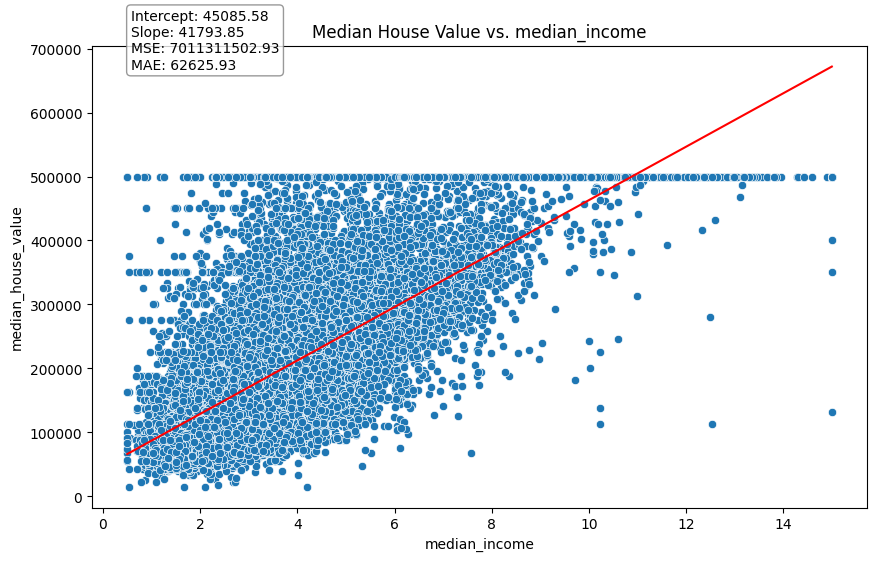

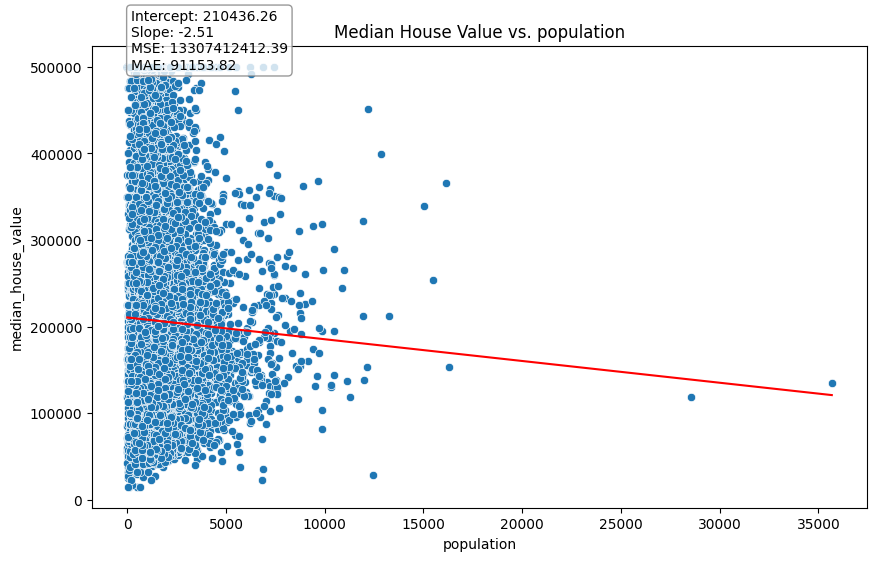

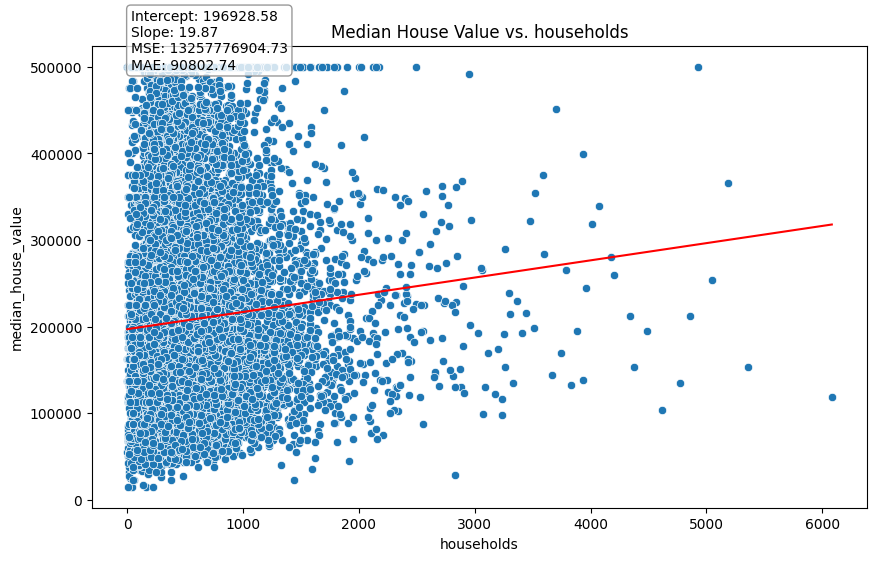

In [10]:
for var in independent_vars:
    X = df[[var]]
    y = df['median_house_value']
    
    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=var, y='median_house_value')
    sns.lineplot(x=df[var], y=y_pred, color='red')
    plt.title(f'Median House Value vs. {var}')
    plt.annotate(f'Intercept: {model.intercept_:.2f}\nSlope: {model.coef_[0]:.2f}\nMSE: {mse:.2f}\nMAE: {mae:.2f}', 
                 xy=(0.05, 0.95), xycoords='axes fraction', 
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    plt.show()

Conclusion

median income appears to be the best fit for predicting median house value, among the 3 independent variables.
The plot suggest that as median income increases, the median house value tends to increase as well.

Population shows a slight negative correlation with the median house value trending downwards with an increasing population. The high variance in the data makes this a weaker fit

Households display a weak positive correlation with median house value, but the high level of variance makes this a weaker fit as well.

Median Income appears to be the most reliable variable for prediction.
the high variance in all plots show that there are other factors affecting the prices

For further analysis we could 
- combine the 3 independent variables and perform multiple linear regression and see their combined effect on the median income.
- account for outliers
- try to use non-linear models